# Exemplo 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn')
plt.rc('axes', titlesize=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lstx = (12,15,42,52,59,73,82,91,96,105,114,120,121,128,130,
        139,139,157,1,1,2,8,11,18,22,31,37,61,72,81,97,112,
        118,127,131,140,151,159,177,206)
lsty= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,
       0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(lstx, lsty)),
               columns =["x","y"])
x=df['x']
y=df['y']
df.head()

,x,y
0,12,1
1,15,1
2,42,1
3,52,1
4,59,1


In [ ]:
#adicionar uma constante preditora
x = sm.add_constant(x)
# Construir o modelo e ajustar os dados
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.681303
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Mar 2022   Pseudo R-squ.:                0.009934
Time:                        02:52:11   Log-Likelihood:                -27.252
converged:                       True   LL-Null:                       -27.526
Covariance Type:            nonrobust   LLR p-value:                    0.4596
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5727      0.602     -0.951      0.342      -1.753       0.608
x              0.0043      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#b0 e b1
b=model.params
print(model.params)

const   -0.572693
x        0.004296
dtype: float64


Text(0, 0.5, 'p(x) Com ou sem Cifose')

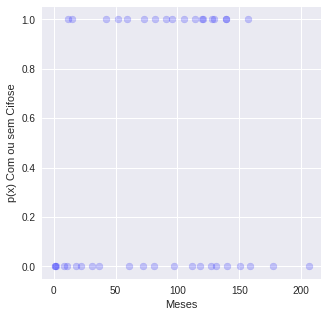

In [ ]:
x=df['x']
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(x, y, color='b', alpha=0.20)
ax.set_xlabel('Meses')
ax.set_ylabel('p(x) Com ou sem Cifose')


In [ ]:
#usar a tabela tstudent
from scipy.stats import t
alpha = 0.05  # nível de signif.= 5% 
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
tcrit=v
print(f'tcrit=: {v}') 

tcrit=: 2.024394164575136


In [ ]:
#z: estatística de teste 
zt=model.tvalues
ztb1=zt[1]
ztb1

0.7344029072729139

In [ ]:
#usar a tabela tstudent
from scipy.stats import t
#calculate p-value  TWO TAILED
p_val= (1-t.cdf(x=abs(ztb1), df=len(x))) * 2
p_val

0.46698681622739535

# Exemplo 2

In [ ]:
lstxr = (55.3,55.3,55.3,55.9,55.9,55.9,55.9,56.1,56.1,56.1,56.1,56.1,56.1,56.8,
        56.8,57.0,57.0,57.0,57.8,57.8,57.8,57.9,57.9,57.9,58.8,58.8,58.8,59.8,
        59.8,59.8,62.2,62.2,65.3,65.3,65.3,65.3,68.7,69.0,73.0,73.0,63.8,63.8,
        63.8,63.9,63.9,63.9,64.7,64.7,64.7,65.1,65.1,65.1,67.4,67.4,67.4,67.4,
        68.7,68.7,68.7,70.4,70.4,71.2,71.2,73.1,73.1,74.6,74.6,74.6,74.6,79.3,
        79.3,79.3,79.3,79.3,83.0,83.0,83.0)
lstyr= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0)
# Construir o DataFrame e nomear as colunas
df1 = pd.DataFrame(list(zip(lstxr, lstyr)),
               columns =["x","y"])
x=df1['x']
y=df1['y']
df1.head()

,x,y
0,55.3,1
1,55.3,1
2,55.3,1
3,55.9,1
4,55.9,1


In [ ]:
#adicionar uma constante preditora
x = sm.add_constant(x)
# Construir o modelo e ajustar os dados
modelo = sm.Logit(y, x).fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.353003
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   77
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Mar 2022   Pseudo R-squ.:                  0.4902
Time:                        02:52:12   Log-Likelihood:                -27.181
converged:                       True   LL-Null:                       -53.314
Covariance Type:            nonrobust   LLR p-value:                 4.849e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0140      5.041      4.565      0.000      13.133      32.895
x             -0.3562      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# performing predictions on the test datdaset
yhat = modelo.predict()
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y
print('Valores observados:', list(y))
print('Valores previstos:', prediction)
df2 = pd.DataFrame(list(zip(y, prediction)),
               columns =["x","y"])
#df2.to_csv(index=False)


Valores observados: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Valores previstos: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import (confusion_matrix,accuracy_score)
 
# confusion matrix
cm = confusion_matrix(y, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, prediction))

Confusion Matrix : 
 [[31  6]
 [ 8 32]]
Test accuracy =  0.8181818181818182


Text(0, 0.5, 'p(x) Aceitável - Não aceitável')

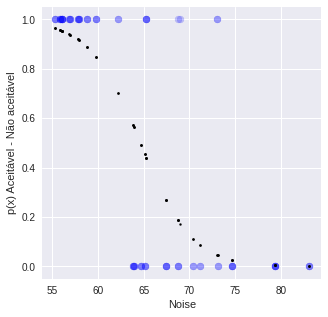

In [ ]:
x=df1['x']
y=df1['y']
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(x, y, color='b', alpha=0.20)
ax.scatter(x, yhat, color="black", s=4)
ax.set_xlabel('Noise')
ax.set_ylabel('p(x) Aceitável - Não aceitável')

In [ ]:
#z: estatística de teste 
zt2=modelo.tvalues
ztb1=zt2[1]
ztb1

-4.543196364190289

In [ ]:
#usar a tabela tstudent
from scipy.stats import t
#calculate p-value  TWO TAILED
p_val= (1-t.cdf(x=abs(ztb1), df=len(x))) * 2
p_val

2.0197364118068606e-05

In [ ]:
#Obter a razão das chances
odd=np.exp(modelo.params)
odd[1]

0.7003306991172532

In [ ]:
#params = modelo.params
#conf = modelo.conf_int()
#conf['Odds Ratio'] = params
#conf.columns = ['5%', '95%', 'Odds Ratio']
#print(np.exp(conf))


                  5%           95%    Odds Ratio
const  505293.279605  1.932709e+14  9.882230e+09
x           0.600573  8.166583e-01  7.003307e-01
